In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced, beautiful visualizations
import warnings  # To handle warning messages

# Configure display settings
warnings.filterwarnings('ignore')  # Hide warning messages for cleaner output
pd.set_option('display.max_columns', None)  # Show all columns when displaying data
plt.style.use('seaborn-v0_8-darkgrid')  # Set a nice visual style for our charts
sns.set_palette("husl")  # Set a colorful palette

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ All libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2


In [2]:
# Load the dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

print("📥 Downloading dataset... (this may take 30-60 seconds)")
df = pd.read_excel(url)
print("✅ Dataset loaded successfully!\n")

# Let's explore what we have
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\n📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   (That's {df.shape[0]:,} individual items purchased!)\n")

# Display the first few rows
print("🔍 First 5 rows of the dataset:")
print(df.head())

print("\n" + "=" * 60)
print("COLUMN INFORMATION")
print("=" * 60)
print(df.info())

print("\n" + "=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
print(df.describe())

📥 Downloading dataset... (this may take 30-60 seconds)
✅ Dataset loaded successfully!

DATASET OVERVIEW

📊 Dataset Shape: 541,909 rows × 8 columns
   (That's 541,909 individual items purchased!)

🔍 First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00    

In [3]:
print("🧹 CLEANING THE DATA")
print("=" * 60)

# Check for missing values
print("\n1️⃣ Checking for missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\n   → CustomerID has {df['CustomerID'].isnull().sum():,} missing values")

# Store original size
original_size = len(df)

# Remove rows with missing CustomerID (we need it for customer analysis)
df = df.dropna(subset=['CustomerID'])
print(f"\n2️⃣ Removed rows with missing CustomerID")
print(f"   → Rows remaining: {len(df):,} (removed {original_size - len(df):,} rows)")

# Remove cancelled orders (those with negative quantities)
cancelled_orders = len(df[df['Quantity'] < 0])
df = df[df['Quantity'] > 0]
print(f"\n3️⃣ Removed cancelled/returned orders")
print(f"   → Removed {cancelled_orders:,} cancelled items")

# Remove invalid prices (zero or negative)
invalid_prices = len(df[df['UnitPrice'] <= 0])
df = df[df['UnitPrice'] > 0]
print(f"\n4️⃣ Removed items with invalid prices")
print(f"   → Removed {invalid_prices:,} items")

# Create new useful columns
print(f"\n5️⃣ Creating new calculated columns...")

# Total sales amount for each item (Quantity × Price)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Extract date components for time-based analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

print("   ✅ Created: TotalPrice, Year, Month, Day, DayOfWeek, Hour")

# Final cleaned dataset
print("\n" + "=" * 60)
print("✅ CLEANING COMPLETE!")
print("=" * 60)
print(f"Final dataset size: {len(df):,} rows × {len(df.columns)} columns")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"\nFirst few rows of cleaned data:")
print(df.head())

🧹 CLEANING THE DATA

1️⃣ Checking for missing values:
Description      1454
CustomerID     135080
dtype: int64

   → CustomerID has 135,080 missing values

2️⃣ Removed rows with missing CustomerID
   → Rows remaining: 406,829 (removed 135,080 rows)

3️⃣ Removed cancelled/returned orders
   → Removed 8,905 cancelled items

4️⃣ Removed items with invalid prices
   → Removed 40 items

5️⃣ Creating new calculated columns...
   ✅ Created: TotalPrice, Year, Month, Day, DayOfWeek, Hour

✅ CLEANING COMPLETE!
Final dataset size: 397,884 rows × 14 columns
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00

First few rows of cleaned data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   


In [4]:
print("📈 DATA ANALYSIS")
print("=" * 60)

# Analysis 1: Total Revenue
total_revenue = df['TotalPrice'].sum()
print(f"\n💰 1. TOTAL REVENUE")
print(f"   → £{total_revenue:,.2f}")
print(f"   → That's over £{total_revenue/1_000_000:.1f} million!")

# Analysis 2: Number of unique customers
unique_customers = df['CustomerID'].nunique()
print(f"\n👥 2. UNIQUE CUSTOMERS")
print(f"   → {unique_customers:,} different customers made purchases")

# Analysis 3: Average order value
avg_order_value = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
print(f"\n🛒 3. AVERAGE ORDER VALUE")
print(f"   → £{avg_order_value:.2f} per order")

# Analysis 4: Top 10 selling products
print(f"\n🏆 4. TOP 10 BEST-SELLING PRODUCTS (by quantity)")
top_products = df.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).sort_values('Quantity', ascending=False).head(10)
print(top_products)

# Analysis 5: Top 10 revenue-generating products
print(f"\n💎 5. TOP 10 REVENUE-GENERATING PRODUCTS")
top_revenue_products = df.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).sort_values('TotalPrice', ascending=False).head(10)
print(top_revenue_products)

# Analysis 6: Sales by country
print(f"\n🌍 6. TOP 10 COUNTRIES BY REVENUE")
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(country_sales)

# Analysis 7: Monthly sales trend
print(f"\n📅 7. MONTHLY SALES TREND")
monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)
print(monthly_sales)

# Analysis 8: Customer segmentation
print(f"\n🎯 8. CUSTOMER SEGMENTATION (by total spending)")
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_spending.columns = ['CustomerID', 'TotalSpending']

# Categorize customers
customer_spending['Segment'] = pd.cut(customer_spending['TotalSpending'],
                                       bins=[0, 500, 1500, 5000, float('inf')],
                                       labels=['Low Value', 'Medium Value', 'High Value', 'VIP'])

segment_counts = customer_spending['Segment'].value_counts()
print(segment_counts)

# Analysis 9: Day of week analysis
print(f"\n📆 9. SALES BY DAY OF WEEK")
day_sales = df.groupby('DayOfWeek')['TotalPrice'].sum().sort_values(ascending=False)
print(day_sales)

# Analysis 10: Peak shopping hours
print(f"\n⏰ 10. PEAK SHOPPING HOURS")
hourly_sales = df.groupby('Hour').agg({
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceNo': 'NumberOfOrders'})
print(hourly_sales.sort_values('TotalPrice', ascending=False))

📈 DATA ANALYSIS

💰 1. TOTAL REVENUE
   → £8,911,407.90
   → That's over £8.9 million!

👥 2. UNIQUE CUSTOMERS
   → 4,338 different customers made purchases

🛒 3. AVERAGE ORDER VALUE
   → £480.87 per order

🏆 4. TOP 10 BEST-SELLING PRODUCTS (by quantity)
                                    Quantity  TotalPrice
Description                                             
PAPER CRAFT , LITTLE BIRDIE            80995   168469.60
MEDIUM CERAMIC TOP STORAGE JAR         77916    81416.73
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415    13586.25
JUMBO BAG RED RETROSPOT                46181    85220.78
WHITE HANGING HEART T-LIGHT HOLDER     36725   100448.15
ASSORTED COLOUR BIRD ORNAMENT          35362    56580.34
PACK OF 72 RETROSPOT CAKE CASES        33693    16394.53
POPCORN HOLDER                         30931    23427.71
RABBIT NIGHT LIGHT                     27202    51346.20
MINI PAINT SET VINTAGE                 26076    16039.24

💎 5. TOP 10 REVENUE-GENERATING PRODUCTS
                      

📊 CREATING VISUALIZATIONS
✅ Visualizations created successfully!
💾 Saved as 'ecommerce_analysis.png'


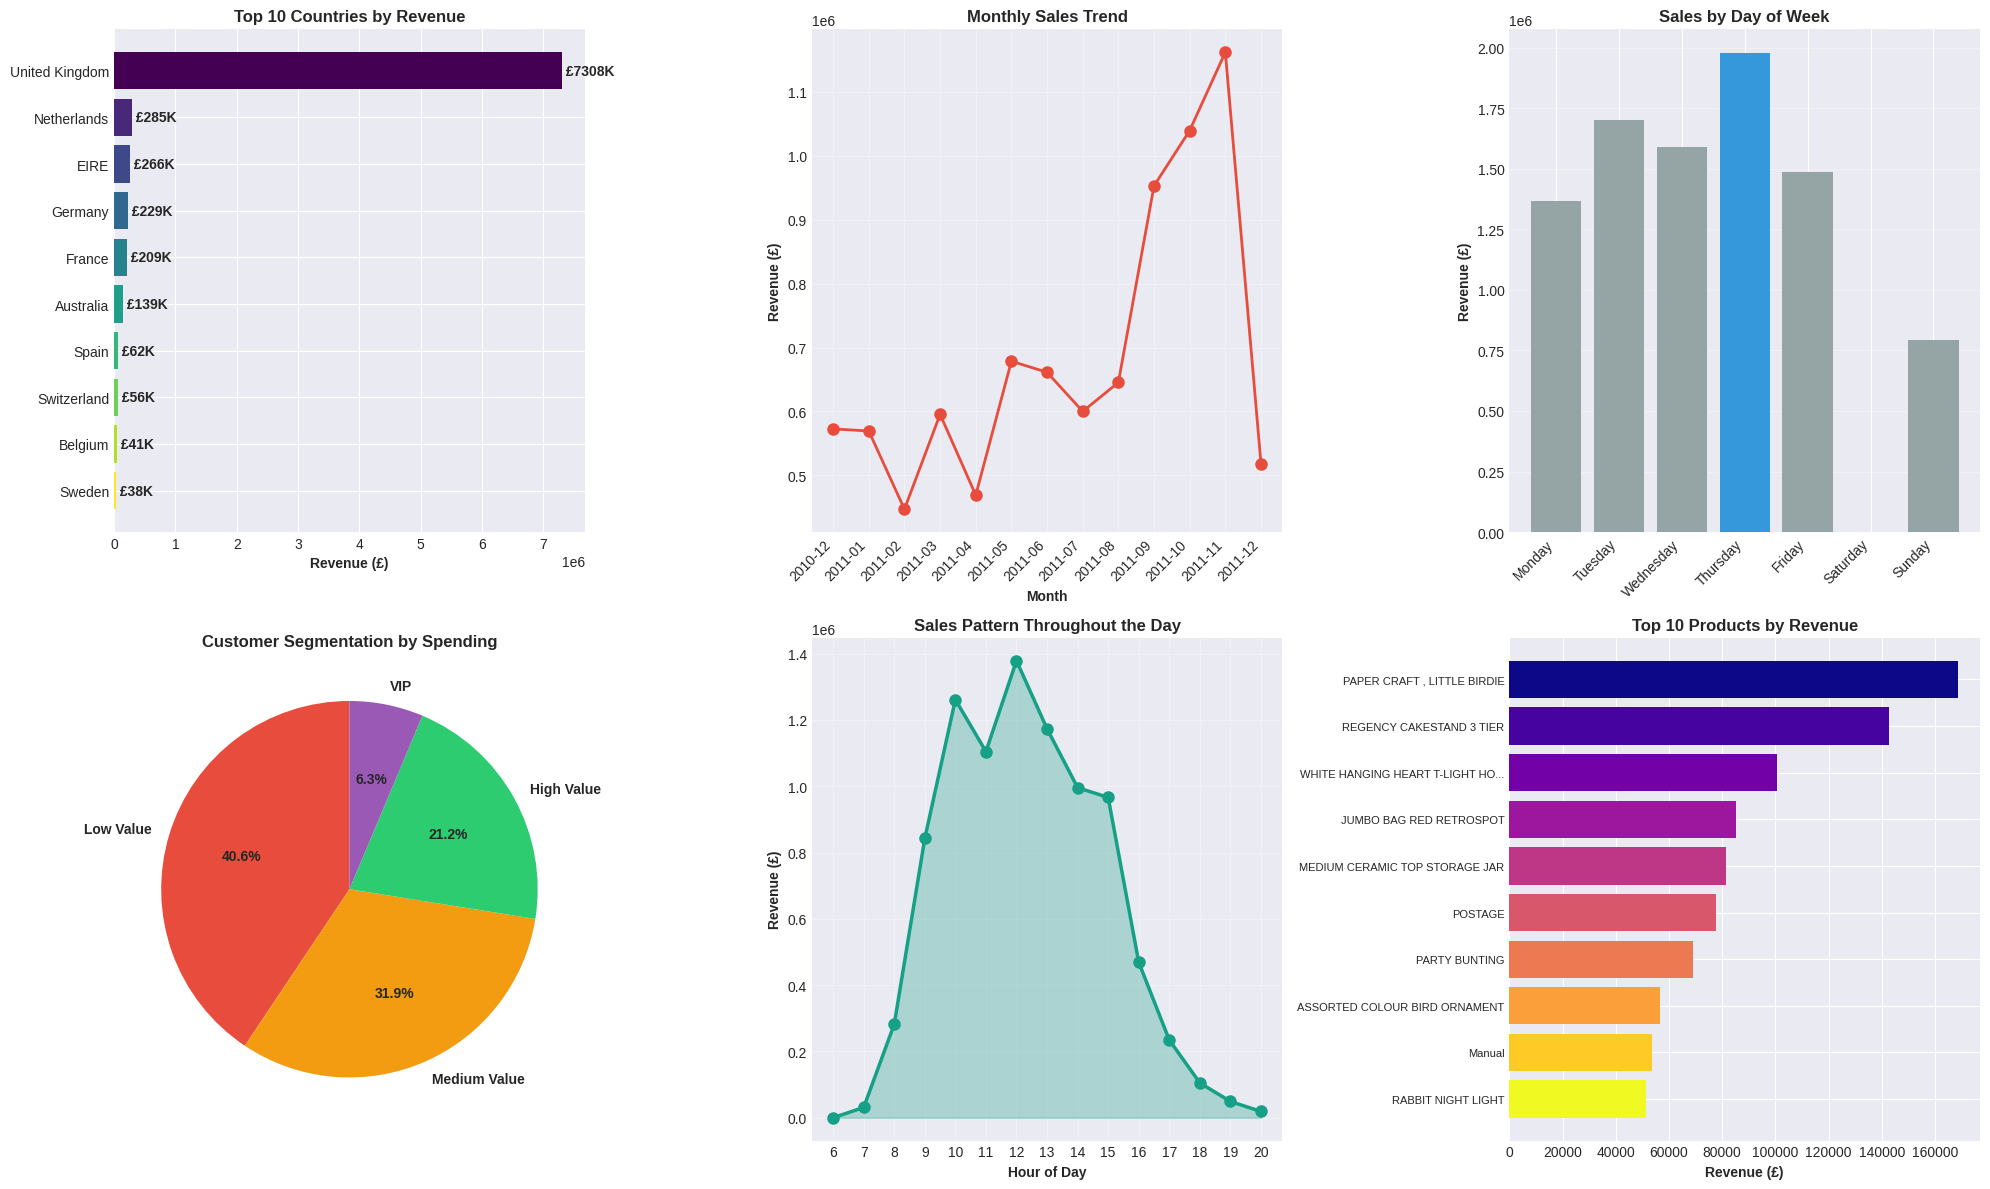


📈 Bonus heatmap created!


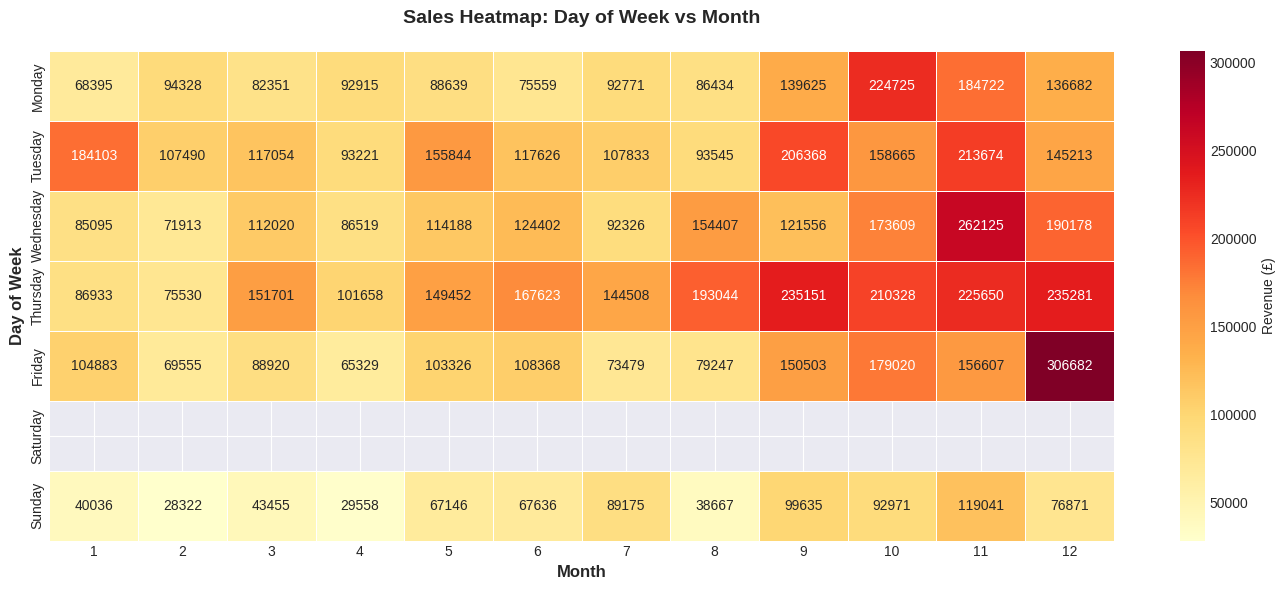

In [5]:
print("📊 CREATING VISUALIZATIONS")
print("=" * 60)

# Set up the plotting area
fig = plt.figure(figsize=(20, 12))

# Visualization 1: Top 10 Countries by Revenue
plt.subplot(2, 3, 1)
top_10_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
colors = plt.cm.viridis(np.linspace(0, 1, 10))
plt.barh(range(len(top_10_countries)), top_10_countries.values, color=colors)
plt.yticks(range(len(top_10_countries)), top_10_countries.index)
plt.xlabel('Revenue (£)', fontsize=10, fontweight='bold')
plt.title('Top 10 Countries by Revenue', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_10_countries.values):
    plt.text(v, i, f' £{v/1000:.0f}K', va='center', fontweight='bold')

# Visualization 2: Monthly Sales Trend
plt.subplot(2, 3, 2)
monthly_sales_plot = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()
plt.plot(monthly_sales_plot.index.astype(str), monthly_sales_plot.values,
         marker='o', linewidth=2, markersize=8, color='#e74c3c')
plt.xlabel('Month', fontsize=10, fontweight='bold')
plt.ylabel('Revenue (£)', fontsize=10, fontweight='bold')
plt.title('Monthly Sales Trend', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Visualization 3: Sales by Day of Week
plt.subplot(2, 3, 3)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales_ordered = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex(day_order)
colors_day = ['#3498db' if x == day_sales_ordered.max() else '#95a5a6' for x in day_sales_ordered.values]
plt.bar(range(len(day_sales_ordered)), day_sales_ordered.values, color=colors_day)
plt.xticks(range(len(day_sales_ordered)), day_sales_ordered.index, rotation=45, ha='right')
plt.ylabel('Revenue (£)', fontsize=10, fontweight='bold')
plt.title('Sales by Day of Week', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Visualization 4: Customer Segmentation
plt.subplot(2, 3, 4)
segment_counts_sorted = customer_spending['Segment'].value_counts().sort_index()
colors_segment = ['#e74c3c', '#f39c12', '#2ecc71', '#9b59b6']
wedges, texts, autotexts = plt.pie(segment_counts_sorted.values,
                                     labels=segment_counts_sorted.index,
                                     autopct='%1.1f%%',
                                     colors=colors_segment,
                                     startangle=90,
                                     textprops={'fontweight': 'bold'})
plt.title('Customer Segmentation by Spending', fontsize=12, fontweight='bold')

# Visualization 5: Hourly Sales Pattern
plt.subplot(2, 3, 5)
hourly_sales_data = df.groupby('Hour')['TotalPrice'].sum()
plt.plot(hourly_sales_data.index, hourly_sales_data.values,
         marker='o', linewidth=2.5, markersize=8, color='#16a085')
plt.xlabel('Hour of Day', fontsize=10, fontweight='bold')
plt.ylabel('Revenue (£)', fontsize=10, fontweight='bold')
plt.title('Sales Pattern Throughout the Day', fontsize=12, fontweight='bold')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.fill_between(hourly_sales_data.index, hourly_sales_data.values, alpha=0.3, color='#16a085')

# Visualization 6: Top 10 Products by Revenue
plt.subplot(2, 3, 6)
top_10_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
colors_prod = plt.cm.plasma(np.linspace(0, 1, 10))
plt.barh(range(len(top_10_products)), top_10_products.values, color=colors_prod)
plt.yticks(range(len(top_10_products)),
           [desc[:30] + '...' if len(desc) > 30 else desc for desc in top_10_products.index],
           fontsize=8)
plt.xlabel('Revenue (£)', fontsize=10, fontweight='bold')
plt.title('Top 10 Products by Revenue', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('ecommerce_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Visualizations created successfully!")
print("💾 Saved as 'ecommerce_analysis.png'")
plt.show()

# Additional detailed visualization: Sales heatmap by Month and Day
fig, ax = plt.subplots(figsize=(14, 6))
pivot_data = df.groupby(['Month', 'DayOfWeek'])['TotalPrice'].sum().reset_index()
pivot_table = pivot_data.pivot(index='DayOfWeek', columns='Month', values='TotalPrice')
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd',
            cbar_kws={'label': 'Revenue (£)'}, linewidths=0.5)
plt.title('Sales Heatmap: Day of Week vs Month', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Day of Week', fontsize=12, fontweight='bold')
plt.tight_layout()
print("\n📈 Bonus heatmap created!")
plt.show()

In [9]:
print("\n" + "=" * 60)
print("📋 EXECUTIVE SUMMARY: KEY INSIGHTS")
print("=" * 60)

# Calculate key metrics
total_revenue = df['TotalPrice'].sum()
total_orders = df['InvoiceNo'].nunique()
total_customers = df['CustomerID'].nunique()
avg_order_value = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
avg_customer_value = customer_spending['TotalSpending'].mean()
top_country = df.groupby('Country')['TotalPrice'].sum().idxmax()
best_day = df.groupby('DayOfWeek')['TotalPrice'].sum().idxmax()
peak_hour = df.groupby('Hour')['TotalPrice'].sum().idxmax()

print(f"""
BUSINESS METRICS:
   • Total Revenue: £{total_revenue:,.2f}
   • Total Orders: {total_orders:,}
   • Unique Customers: {total_customers:,}
   • Average Order Value: £{avg_order_value:.2f}
   • Average Customer Lifetime Value: £{avg_customer_value:.2f}

GEOGRAPHIC INSIGHTS:
   • Top Market: {top_country} ({df[df['Country']==top_country]['TotalPrice'].sum()/total_revenue*100:.1f}% of revenue)
   • International Presence: {df['Country'].nunique()} countries

TEMPORAL PATTERNS:
   • Best Day: {best_day}
   • Peak Shopping Hour: {peak_hour}:00
   • Strongest Month: {df.groupby('Month')['TotalPrice'].sum().idxmax()} (likely November/December holiday season)

CUSTOMER SEGMENTATION:
   • Low Value Customers: {(customer_spending['Segment']=='Low Value').sum():,} ({(customer_spending['Segment']=='Low Value').sum()/len(customer_spending)*100:.1f}%)
   • Medium Value: {(customer_spending['Segment']=='Medium Value').sum():,} ({(customer_spending['Segment']=='Medium Value').sum()/len(customer_spending)*100:.1f}%)
   • High Value: {(customer_spending['Segment']=='High Value').sum():,} ({(customer_spending['Segment']=='High Value').sum()/len(customer_spending)*100:.1f}%)
   • VIP Customers: {(customer_spending['Segment']=='VIP').sum():,} ({(customer_spending['Segment']=='VIP').sum()/len(customer_spending)*100:.1f}%)

ACTIONABLE RECOMMENDATIONS:
   1. Focus marketing on {top_country} - it's your primary market
   2. Run promotions on {best_day}s when sales peak
   3. Schedule email campaigns for {peak_hour}:00 when customers are most active
   4. Target VIP customers with exclusive offers - they drive significant revenue
   5. Expand international shipping to grow beyond {top_country}
   6. Stock up inventory before November/December for holiday rush

""")

print("=" * 60)
print("PROJECT COMPLETE!")
print("=" * 60)


📋 EXECUTIVE SUMMARY: KEY INSIGHTS

BUSINESS METRICS:
   • Total Revenue: £8,911,407.90
   • Total Orders: 18,532
   • Unique Customers: 4,338
   • Average Order Value: £480.87
   • Average Customer Lifetime Value: £2054.27

GEOGRAPHIC INSIGHTS:
   • Top Market: United Kingdom (82.0% of revenue)
   • International Presence: 37 countries
   
TEMPORAL PATTERNS:
   • Best Day: Thursday
   • Peak Shopping Hour: 12:00
   • Strongest Month: 11 (likely November/December holiday season)

CUSTOMER SEGMENTATION:
   • Low Value Customers: 1,762 (40.6%)
   • Medium Value: 1,382 (31.9%)
   • High Value: 919 (21.2%)
   • VIP Customers: 275 (6.3%)

ACTIONABLE RECOMMENDATIONS:
   1. Focus marketing on United Kingdom - it's your primary market
   2. Run promotions on Thursdays when sales peak
   3. Schedule email campaigns for 12:00 when customers are most active
   4. Target VIP customers with exclusive offers - they drive significant revenue
   5. Expand international shipping to grow beyond United K